🔍 What is Supervised Learning?
You train a model using labeled data (input → output). 
It learns the mapping and can predict outputs for new inputs.

✅ Key Concepts Checklist for Step 1:

Concept	Why It Matters:

Features (X) & Target (y)	Needed to split data properly
Classification vs Regression	Two major ML problem types
Train-Test Split	To evaluate model on unseen data
Model: LinearRegression, LogisticRegression	Foundation models used everywhere
fit(), predict(), score()	Core ML API workflow

Linear Regression

In [108]:
#🧠 Step-by-step Code: Predict Student Marks from Study Hours (Regression)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Sample Dataset
df = pd.DataFrame({
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Marks_Obtained': [30, 40, 50, 55, 65, 70, 75, 85, 95]
})

# Step 2: Split into X and y
X = df[['Hours_Studied']] #2d dataframe -> [[]] so X capital
y = df['Marks_Obtained']  #1d dataframe -> single value so y small
# print(X), Scikit-learn expects X to be 2D, even if there’s just one feature. So we use double brackets.

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_test)
# here test_size=0.2, test data=20% (out of 9 rows, 2 for test, 7 for train). here 1,3,4,5,6,7,9 ae for train 2,8 for test. random state randomly select 2 rows -> detailed below
#📌 This split is essential for real-world ML so we can train on X_train, test on X_test, and avoid overfitting.

# Step 4: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Predict and Evaluate
predictions = model.predict(X_test)
print("Predictions:", predictions)
print("Score (R²):", model.score(X_test, y_test)) #model.score gives r2 score for regression, for classification it give accuracy score
#R² (R-squared) = Coefficient of Determination.
# It tells you 'how well your model explains the variation in the data'.
# R^2 = 1- SS_res/SS_tot
# SS_res = Sum of squared residuals (errors)
# SS_tot = Total variance in the data

# 📊 Interpretation:
# R² = 1 → Perfect model
# R² = 0 → Model is as good as predicting the mean
# R² < 0 → Model is worse than mean-based prediction

Predictions: [86.07142857 39.64285714]
Score (R²): 0.998740236835475


✅ What is random_state?
- random_state is a seed value for the random number generator.
- When you do a train_test_split, the rows are shuffled randomly before splitting.

By setting random_state=42 (or any number), you're telling Python:
- “Use the same shuffle pattern every time, so my results are reproducible.”

🧪 Why 42?
- There's nothing magical about 42.
- In ML, people often use 0, 1, or 42 — but you can use any number.

random_state	Seed to fix the randomness

📌 Why is it useful?
Let’s say you're tuning a model: train_test_split(X, y, test_size=0.2)
- If you don’t set random_state, each time you run this, your train/test split is different → model accuracy will vary → makes debugging hard.
- train_test_split(X, y, test_size=0.2, random_state=42). 
You’ll get exactly the same split every time, which is 🔑 for:

Debugging
Comparing models
Sharing results with teammates


3 pillars of every ML model - fit, predict, score

✅ What does .fit(), .predict(), .score() do?
Method	    What it does                            	                            When to use
fit(X, y)	Trains the model on input-output pairs	                                After preparing data
predict(X)	Uses the learned model to make predictions	                            After .fit()
score(X, y)	Returns model accuracy (R² for regression, accuracy for classification)	For evaluation

🎯 Mini Task:
Plot the regression line over the data points.

Predict marks for a student who studied 6.5 hours.

In [109]:
# ✅ Evaluate Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 62.00
MSE: 4328.00
RMSE: 65.79
R² Score: -7.55


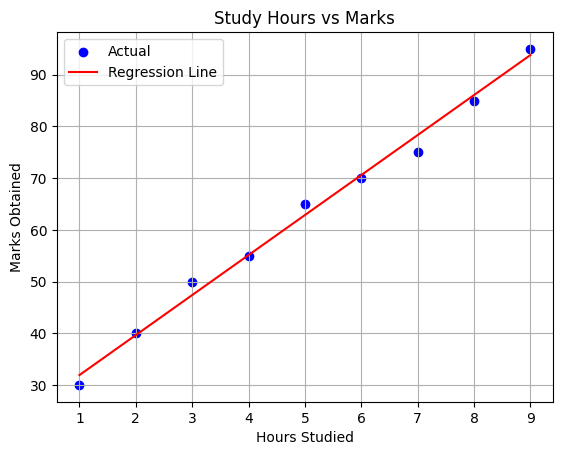

In [112]:
# 🎯 Visualize Regression + Predict for Custom Input
# Plot the regression line
# Predict for a new input (e.g., 6.5 hours studied)
import matplotlib.pyplot as plt

# 1. Plot data points
plt.scatter(X, y, color='blue', label='Actual')
# plt.axhline(0, color='red', linestyle='--')

# 2. Plot regression line
regression_line = model.predict(X)
plt.plot(X, regression_line, color='red', label='Regression Line')

plt.xlabel('Hours Studied')
plt.ylabel('Marks Obtained')
plt.title('Study Hours vs Marks')
plt.legend()
plt.grid(True)
plt.show()

In [113]:
#🔍 Predict for new input (e.g., 6.5 hours)
new_hours = np.array([[6.5]])
predict_hours = model.predict(new_hours)
print(f"predicted marks: {predict_hours[0]:.2f}")


predicted marks: 74.46


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Model Evaluation Metrics — these tell you how good your regression model is quantitatively.

In [114]:
#1. Mean Absolute Error (MAE)
# Average absolute difference between predicted and actual values. 
# Lower is better.
from sklearn.metrics import mean_absolute_error
y_pred=predictions

mae = mean_absolute_error(y_test, y_pred)
print("MAE", mae)

MAE 0.7142857142857046


In [115]:
# 2. Mean Squared Error (MSE)
# Average squared difference between predicted and actual values. Penalizes large errors more.
# Lower is better.
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.6377551020407979


In [116]:
# 3. Root Mean Squared Error (RMSE)
# Square root of MSE, interpretable in same units as output.

# rmse = mean_squared_error(y_test, y_pred, squared=False) works in python 3.8-3.11
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 0.7985957062499134


In [117]:
# 4. R-squared (R²)
#               Proportion of variance explained by model (between 0 and 1, closer to 1 is better).
# Should be higher
r2 = model.score(X_test, y_test)
print("R^2:", r2)


R^2: 0.998740236835475


Logistic Regression

🧠 Concept: Classification with Logistic Regression
While linear regression predicts continuous values (e.g., marks),
classification predicts categories/labels (e.g., pass/fail, yes/no, spam/not spam).

🔍 Real-Life Use Case:
Problem: Can we predict whether a student passes or fails
Input: Hours studied
Output: Pass (1) or Fail (0)

In [118]:
import pandas as pd

# Sample dataset
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Passed':        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df[['Hours_Studied']]
y = df['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(y_test)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Predicted:", y_pred) # 1, 0
print("Actual:", y_test)    # 1, 0


print("Accuracy:", model.score(X_test, y_test))


Predicted: [1 0]
Actual: 8    1
1    0
Name: Passed, dtype: int64
Accuracy: 1.0


🔁 Logistic Regression Curve Visualization
🔍 Intuition:
Logistic regression outputs probabilities between 0 and 1.

At a certain point (called decision boundary, e.g., 0.5), it flips from fail (0) to pass (1).

🧠 Insight:
The curve is S-shaped (sigmoid).

Anything above 0.5 → Class 1 (Pass), below → Class 0 (Fail).

c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


[[0.34702624 0.65297376]]


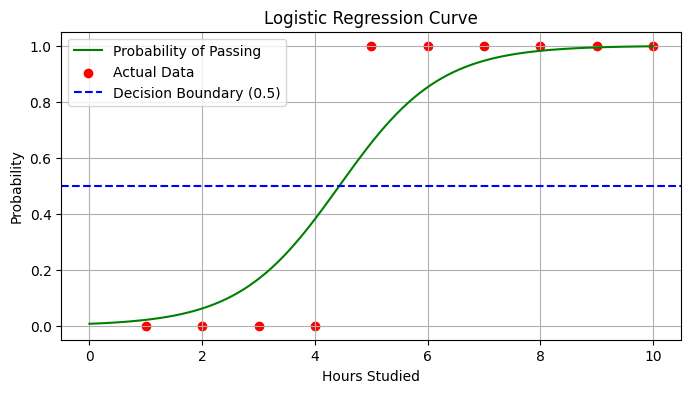

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate hours from 0 to 10
X_range = np.linspace(0, 10, 100).reshape(-1, 1)
probs = model.predict_proba(X_range)[:,1]  # Probability of class "1" (pass)
print(model.predict_proba([[5]]))

# Plot
plt.figure(figsize=(8, 4))

plt.plot(X_range, probs, label='Probability of Passing', color='green') #core curve logistic regression learns - starts near 0 (low chance of passing), rises quickly around the decision boundary (e.g. 5 hours), then flattens near 1.
plt.scatter(df['Hours_Studied'], df['Passed'], color='red', label='Actual Data') # compare what the model learned vs what the actual data is
plt.axhline(0.5, color='blue', linestyle='--', label='Decision Boundary (0.5)') #decision boundary

plt.xlabel('Hours Studied')
plt.ylabel('Probability')
plt.title('Logistic Regression Curve')
plt.legend()
plt.grid(True)
plt.show()


#linspace - Generates 100 equally spaced values between 0 and 10.
#🎯 Why it's needed: Your model was trained on values like Hours_Studied. Now we want to see how the model predicts over the full range, not just for points in your dataset.

 we want to see how the model predicts over the full range, not just for points in your dataset.
 
 ✅ X_range = np.linspace(0, 10, 100).reshape(-1, 1)
# np.linspace generates 100 evenly spaced values from 0 to 10.
# reshape(-1, 1) -  reshaping a NumPy array to a 2D shape like (rows, columns). But sometimes you don’t know how many rows are needed
    # You're telling NumPy: “I want 1 column. You automatically fit rows based on the total number of elements(-1).”

arr = np.array([10, 20, 30, 40]) #1d
print(arr.shape)         # (4,)
print(arr.reshape(-1, 1)) # (4,1) #2d converted from 1d
# np.linspace(0, 10, 100) creates a 1D array → shape (100,)
# reshape(-1, 1) turns it into shape (100, 1)

# sklearn models requires 2d input (n_samples, n_features)
✅ probs = model.predict_proba(X_range)[:,1] 

# 🧠 predict_proba() returns two columns:
- [:, 0] → Probability of class 0 (Fail)
- [:, 1] → Probability of class 1 (Pass)

# 🎯 Why it's needed:
Logistic Regression doesn’t just say “pass/fail.” It gives a probability, like 0.8 → “80% chance of passing.”

We’re going to plot this probability curve.
# code line is responsible for sigmoid curve
#  predict_proba Function returns class probabilities (typically after sigmoid or softmax).

🔍 Where Does the Sigmoid Curve

# Internally, LogisticRegression uses the sigmoid function to map raw scores to probabilities, Plotting this over X_range gives the sigmoid S-curve.

# 🔁 Behind the scenes:
Logistic Regression learns a linear function:
# z = w * x + b
Then applies the sigmoid function:
# sigmoid(z) = 1 / (1 + exp(-z)) 
Which maps outputs to the 0–1 range → probability!

#behind the scene Logistic regression uses:
# P(y=1|x) = 1/(1+ e^-(β0+β1.x))
# This sigmoid formula outputs values between 0 and 1.
# model.predict_proba() uses this internally after learning β0, β1 during .fit().

✅ Why do we use this plot?
To visualize how probability changes with respect to input (hours studied).

It shows confidence of the model in predicting "pass".

The curve helps us understand threshold behavior in binary classification.

✅ Difference: predict() vs predict_proba()
predict(X) 
- returns final class label (0/1) 
-> use when u just need the prediction result

predict_proba(X)  - expects same input as fit (2d)
- returns probability of each class(eg. [0.2, 0.8]) 
-> use when u want to know model confidence level

- only used in classification -> contributes to sigmoid/softmax shape
- returns probabilities of each class
- doesn't only say pass fail, it gives probaiblities

model.predict([[5]])         ➝ [1]             # Predicts class: PASS
model.predict_proba([[5]])   ➝ [[0.23, 0.77]]  # 77% chance of passing

# Classification
- Classification models (like Logistic Regression, Random Forest Classifier, etc.) predict discrete classes (e.g., Pass/Fail, 0/1, Cat/Dog).
-> give a probability for each class

model.predict_proba([[5]])  ➝ [[0.3, 0.7]]

# Regression
- They predict a continuous number

model.predict([[5]])  ➝ [67.3]  # e.g., marks out of 100
predict_proba() doesn't apply.


✅ Mini Task:
Try predicting if a student will pass or fail based on:

2 hours
5 hours
9.5 hours

In [54]:
new_hours= np.array([[9.5]])
output = model.predict(new_hours)
print(f"Student studies for x hours so he {"fails" if output[0] == 0 else "pass"}")

Student studies for x hours so he pass


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


🛠️ Mini Project: Titanic Survival Prediction (Logistic Regression)
🎯 Goal: Predict whether a passenger survived based on features like age, sex, class, etc.

🛠️ Mini Project: Titanic Survival Prediction (Logistic Regression)
🎯 Goal: Predict whether a passenger survived based on features like age, sex, class, etc.

In [152]:
# ✅ STEP 1: Load Titanic Dataset
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [153]:
# ✅ STEP 2: Select Features & Drop Nulls
df = df[['survived', 'pclass', 'sex', 'age']]
df = df.dropna()
print(df.head())

   survived  pclass     sex   age
0         0       3    male  22.0
1         1       1  female  38.0
2         1       3  female  26.0
3         1       1  female  35.0
4         0       3    male  35.0


In [154]:
# ✅ STEP 3: Convert Categorical → Numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
print(df.head())

   survived  pclass  sex   age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    0  35.0


In [155]:
# ✅ STEP 4: Split Data
from sklearn.model_selection import train_test_split

X = df[['pclass', 'sex', 'age']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [166]:
#✅ STEP 5: Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [167]:
# ✅ STEP 6: Evaluate
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.7482517482517482


In [168]:
#✅ STEP 7: Predict for New Passenger
# Predict survival for a 2nd class, female, 30-year-old
print(model.predict([[2, 1, 30]]))


[1]


c:\Users\lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


🧠 Summary (One Line):
Logistic Regression learns a weighted formula to estimate the probability of survival and makes predictions based on a 0.5 cutoff.

✅ Evaluation Metrics for Classification
- evaluate your classification model beyond just accuracy

In [169]:
# 🔢 STEP 1: Predict on Test Set
y_pred = model.predict(X_test)


In [170]:
# 📉 STEP 2: Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)
# Format: [[TN, FP], [FN, TP]]
# TN = True Negatives (correctly predicted NO)
# TP = True Positives (correctly predicted YES)

[[68 19]
 [17 39]]


In [171]:
# 🧪 STEP 3: Accuracy, Precision, Recall, F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.7482517482517482
Precision: 0.6724137931034483
Recall: 0.6964285714285714
F1 Score: 0.6842105263157895


In [172]:
# 📊 Optional: Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.78      0.79        87
           1       0.67      0.70      0.68        56

    accuracy                           0.75       143
   macro avg       0.74      0.74      0.74       143
weighted avg       0.75      0.75      0.75       143



🧠 Summary (One Line):
Evaluation metrics tell you how your model performs on true/false positives/negatives—not just overall accuracy.

# ✅ 1. Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
# 🔍 What it means:
Proportion of total correct predictions.

# 🧠 When to use:
Best when classes are balanced (e.g., 50% spam, 50% not spam).

# ❗️Why it can fail:
If 95% of data is class A and model always predicts A → accuracy = 95%, but it's useless.


# ✅ 2. Precision
precision = TP / (TP + FP)
# 🔍 What it means:
Out of all predicted positives, how many were actually correct?

# 🧠 When to use:
When False Positives are costly

E.g., spam detection (don't wrongly mark an important email as spam)
Medical diagnosis (don’t wrongly say someone has cancer)

# ✅ 3. Recall (a.k.a. Sensitivity or True Positive Rate)
recall = TP / (TP + FN)
# 🔍 What it means:
Out of all actual positives, how many did you correctly find?

# 🧠 When to use:
When False Negatives are costly

E.g., cancer detection (don’t miss a real patient)
Fraud detection (don’t let fraud go undetected)

# ✅ 4. F1 Score
f1 = 2 * (precision * recall) / (precision + recall)
# 🔍 What it means:
- Harmonic mean of Precision and Recall. Balances both.

# 🧠 When to use:
- When you need both precision & recall to be high.

Great for imbalanced datasets.

# ✅ 5. Confusion Matrix 
                Predicted
               0        1
Actual  0    [TN      FP]
        1    [FN      TP]
# 🔍 What it gives:
All 4 outcomes: TP, TN, FP, FN

# 🧠 When to use:
- To visually inspect what types of errors are happening.
- Understand if model is biased toward one class.

# ✅ 6. Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# 🔍 What it gives:
Precision, Recall, F1 for each class (0 & 1 or multi-class)

# 🧠 When to use:
For detailed summary

Especially useful in multi-class problems

📌 Summary Table
Metric	        Best Use Case	                    Avoid If
Accuracy	    Balanced classes	                Imbalanced datasets
Precision	    False Positives are costly	        You need to catch all
Recall	        False Negatives are costly	        You don’t mind misses
F1 Score	    When both precision & recall matter	Data is very balanced
Conf. Matrix	Visual error types	                Use with other metrics
Class Report	Multi-class, detailed breakdown	    -

To remember
# AFTER EVALUATION: What to Do Based on Metrics


--------------------------------------------------------------------------------
# ✅ 1. Accuracy is Low?
Action:
- Check if classes are imbalanced
- Try using precision, recall, F1 instead
- Use resampling:
    - SMOTE() to oversample minority
    - or RandomUnderSampler()
--------------------------------------------------------------------------------

# ✅ 2. Precision is Low (Many False Positives)?
Action:
- Tune model to be more conservative (raise threshold)
- Example: Only predict spam if you're really sure

# y_probs = model.predict_proba(X_test)[:, 1]
# y_pred = (y_probs > 0.8).astype(int)  # higher threshold = more precision

--------------------------------------------------------------------------------

# ✅ 3. Recall is Low (Many False Negatives)?
Action:
- Tune model to be more aggressive (lower threshold)
- Example: Cancer detection — better to flag too many than miss
# y_pred = (y_probs > 0.3).astype(int)  # lower threshold = more recall

--------------------------------------------------------------------------------

# ✅ 4. F1 is Low?
Action:
- It means bad balance between precision and recall.
# Try:
- Better features (feature engineering)
- Different model (e.g., RandomForest, XGBoost)
- Hyperparameter tuning (GridSearchCV)

--------------------------------------------------------------------------------

# ✅ 5. Confusion Matrix shows bias?
Action:
- If many FP or FN → decide based on use-case what you want to reduce
# Try:
    - Class weights
# model = LogisticRegression(class_weight='balanced')

--------------------------------------------------------------------------------

# ✅ 6. ROC AUC < 0.7?
Action:
- Try better model
- Feature engineering
- Use Ensemble Models

# ✅ What is ROC AUC < 0.7?
# 🔷 ROC (Receiver Operating Characteristic) Curve
- It shows the trade-off between True Positive Rate (Recall) and False Positive Rate at different thresholds.
- The curve moves closer to top-left if your model is better.

# 🔷 AUC (Area Under Curve)
- AUC score ranges from 0 to 1.
- Closer to 1 = Better model.

AUC < 0.7 = Weak model (not much better than random guessing)

# AUC Score	Meaning
0.9–1.0	    Excellent 🎯
0.8–0.9	    Good 👍
0.7–0.8	    Fair 😐
< 0.7	    Weak 👎

# ✅ When to use it:
Use AUC when:
- You care about ranking (e.g., fraud detection, disease prediction)
- The data is imbalanced

--------------------------------------------------------------------------------

# 🧠 Final Decision Flow
→ Metrics bad?
   → Data Imbalance?
       → Fix data (SMOTE, weights)
   → Features weak?
       → Add or transform features
   → Model not learning?
       → Try different models (RF, XGB)
   → Threshold issue?
       → Adjust cutoff for precision/recall

# 🚀 Key Tip:
Evaluation = Diagnosis.
Based on the problem (low recall or low precision), take targeted action. No one metric is perfect—optimize based on the real-world cost of FP or FN.

In [ ]:
<!-- 🧠 MINI QUIZ TIME! (Multiple choice + Short) -->

# 1️⃣ When should you prefer Recall over Precision?
A. When false positives are very costly
B. When false negatives are very costly
C. When your model is overfitting
D. Always prefer recall

# 2️⃣ What does F1 Score capture?
A. Only Precision
B. Only Recall
C. Balance between Precision and Recall
D. None of the above

# 3️⃣ (Short Answer)
If you have 95% Accuracy, but your data is 95% one class, what problem might exist?


<!-- ANSWERS -->

# ✅ 1. B. When false negatives are very costly
Correct! Use Recall when missing a positive case is dangerous, like in:
- Cancer detection
- Fraud detection
- Security alerts

# ✅ 2. C. Balance between Precision and Recall
- Spot on! F1 score = harmonic mean of Precision & Recall
- Used when you need a single metric that balances both.

# ✅ 3. Imbalanced Dataset
Exactly!
- A model can predict only the majority class and still show high accuracy.
- That’s why metrics like Precision, Recall, F1, ROC AUC matter more in such cases.



<!-- 🧠 MINI QUIZ TIME! (Multiple choice + Short) -->


# 1. Which metric is most useful for spam email detection?
A. Accuracy
B. Recall
C. Precision
D. RMSE

# 2. You’re predicting if patients have a rare disease. Which metric matters most?
A. Accuracy
B. Recall
C. Precision
D. R² Score

# 3. What does an F1 score of 1.0 indicate?
A. Model has high accuracy
B. Model has zero error
C. Perfect Precision and Recall
D. Only Precision is 100%

# 4. Why is ROC AUC better than accuracy for imbalanced data?
A. It’s easier to calculate
B. It visualizes false positives
C. It considers all classification thresholds
D. It uses fewer samples

# 5. What is the value range of ROC AUC Score?
A. 0 to 1
B. -1 to 1
C. 0 to 100
D. -100 to 100



<!-- ANSWERS -->
# ✅ 1. C – Precision
Correct!
- In spam detection, Precision is key — you don't want to mark legit emails as spam.

🎯 Precision = TP / (TP + FP)

# ✅ 2. B – Recall
Correct!
- In rare disease prediction, Recall is critical — you want to catch all actual positives, even if a few healthy patients are wrongly flagged.

# ✅ 3. C – Perfect Precision and Recall
Correct!
- An F1 score of 1.0 means the model is perfect in both precision and recall. Unrealistic in real-world, but great in toy models.

# ✅ 4. C – It considers all classification thresholds
Correct again!
- ROC AUC is robust for imbalanced datasets because it plots TPR vs FPR at all thresholds, not just one.

# ✅ 5. A – 0 to 1
Correct!
- AUC ranges from 0.0 (worst) to 1.0 (best).

0.5 = random guessing

0.7 = decent
0.9 = excellent

# 🎯 Mini Project: "Loan Default Classifier Evaluation"
You're building a model to predict if someone will default on a loan (1 = default, 0 = not default). This is a high-risk, imbalanced scenario.